# Random Forest Regressor

## imports

In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import itertools
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from model_helper import load_and_format_data, test_and_eval, format_for_model

## constants

In [2]:
GARAGES = ["North Garage", "West Garage", "South Garage"]

# choose dates used in dataset name
DATE_START = "2025-02-13"
DATE_END = "2025-04-14"
ESTIMATORS = 100

## experiment for entire normalized dataset

### load data

In [3]:
# garage used as key with each one assigned a tuple representing the (x_data, y_data)
garage_data = {}

for garage in GARAGES:
    garage_data[garage] = load_and_format_data(garage, DATE_START, DATE_END)

### train model

In [4]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    tree_model = RandomForestRegressor(n_estimators=ESTIMATORS)
    tree_model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = tree_model

/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

### inference, plot, and stats

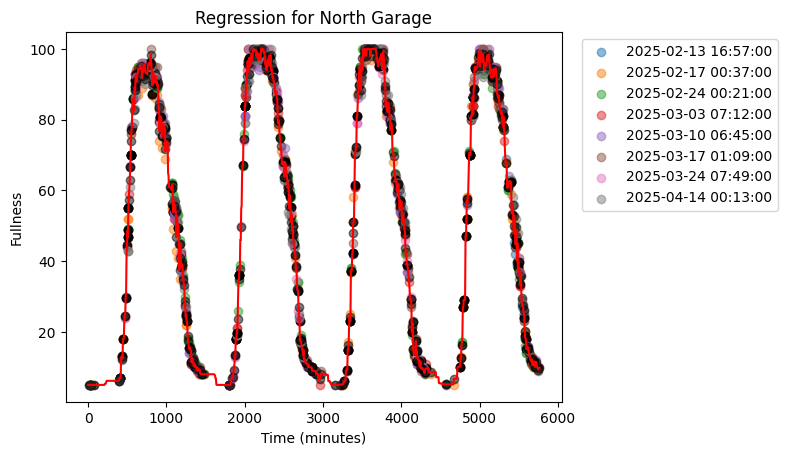

North Garage stats
r^2: 0.9979930514139898
rmse: 0.9618767696945174
mae: 1.4965379721888183




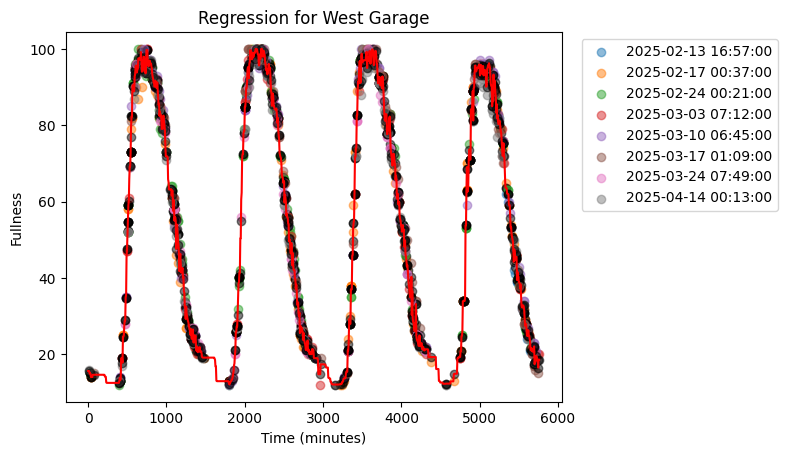

West Garage stats
r^2: 0.9976632762105844
rmse: 0.9270061754409274
mae: 1.415555846960484




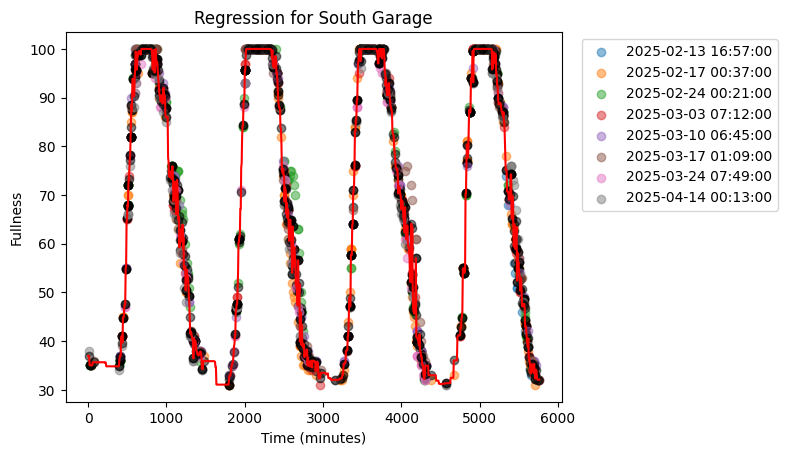

South Garage stats
r^2: 0.9938772348481312
rmse: 0.9851897404232267
mae: 1.9132966037945915




In [5]:
for garage in garage_models:
    formatted_x_data = [format_for_model(s.to_list()) for s in garage_data[garage][0]]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, garage_data[garage][1], garage_models[garage].predict)



## partitioned experiment

### load data

In [6]:
garage_training_data = {}

for garage in GARAGES:
    garage_training_data[garage] = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "training")

### train model

In [7]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_training_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_training_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_training_data[garage][1]))
    tree_model = RandomForestRegressor(n_estimators=ESTIMATORS)
    tree_model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = tree_model

/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

### inference, plot, and stats

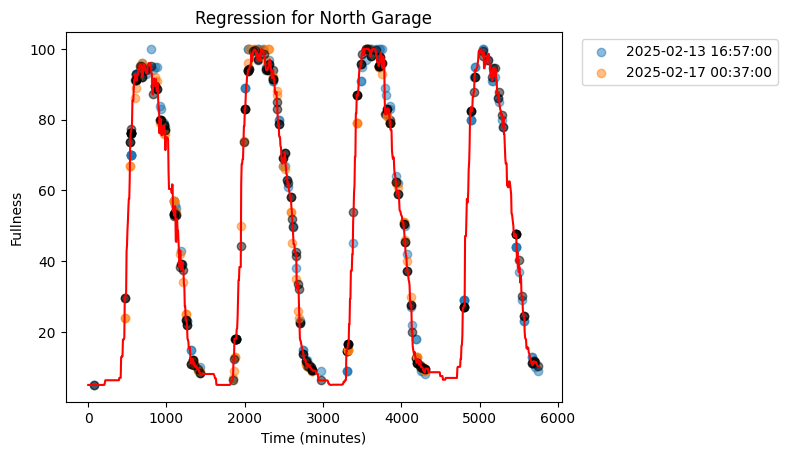

North Garage stats
r^2: 0.9903010745747153
rmse: 2.578398789133571
mae: 3.3732344080129253




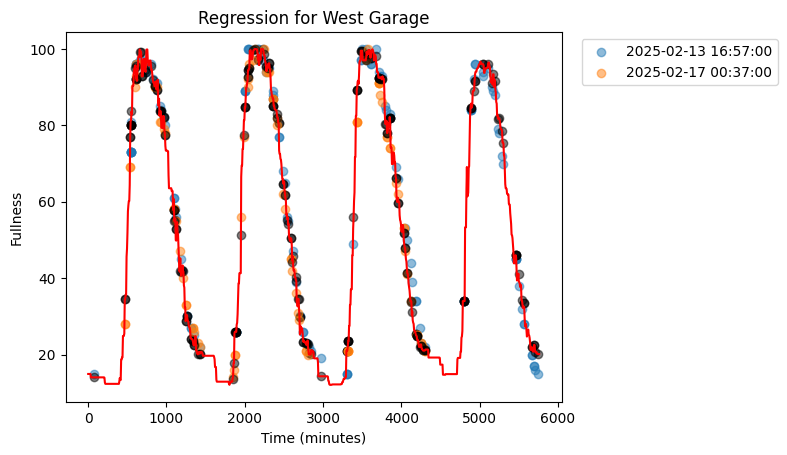

West Garage stats
r^2: 0.9847212557861205
rmse: 2.8149624423545134
mae: 3.6526631037587385




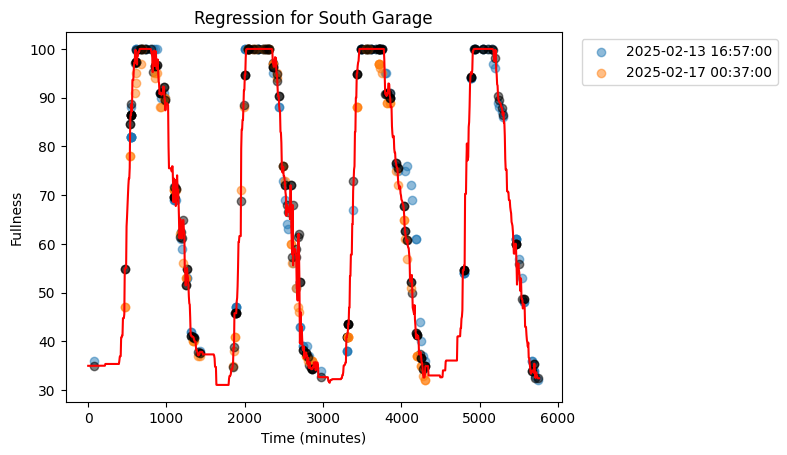

South Garage stats
r^2: 0.9676668191006099
rmse: 2.5852518362285624
mae: 4.443600876528319




In [8]:
for garage in garage_models:
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "test")
    formatted_x_data = [format_for_model(s.to_list()) for s in x_data]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, y_data, garage_models[garage].predict)

